#### Import Packages

In [419]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/Users/jennifer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Read in excel file

In [583]:
df = pd.read_excel('/Users/jennifer/Downloads/Data Scientist Exercise - JP.xlsx','Data')

In [26]:
df.head(5)

,RecordNumber,DaysEnrollToStart,Status,Campus,AdmissionsRepID,ProgramVersion,ZIP,DaysLeadToEnroll,Gender,MaritalStatus,AgeAtLead,LeadSource,IsVeteran,IsHispanic,FinancialAidAdvisorID
0,3107797,48,ACTIVE,1,17007,BSN2015,91732,195,Female,Single,23,12769,0,0,14649.0
1,3076885,130,ACTIVE,1,15985,BSN2015,92336,335,Female,Single,18,12898,0,0,17705.0
2,3134293,73,CANCEL,3,14377,BSN2015,92069,-1,Male,Single,18,12769,0,0,16708.0
3,3107876,126,ACTIVE,3,17430,BSN2015,92672,116,Female,Married,23,1744,0,0,17583.0
4,3109312,103,ACTIVE,3,17430,BSN2015,90201,130,Female,Single,21,1744,0,1,16270.0


In [11]:
df.columns

Index(['RecordNumber', 'DaysEnrollToStart', 'Status', 'Campus',
       'AdmissionsRepID', 'ProgramVersion', 'ZIP', 'DaysLeadToEnroll',
       'Gender', 'MaritalStatus', 'AgeAtLead', 'LeadSource', 'IsVeteran',
       'IsHispanic', 'FinancialAidAdvisorID'],
      dtype='object')

#### Define column type and its unique values

In [73]:
df.ProgramVersion.unique()
# ProgramVersion: categorical, 4 unique programs

array(['BSN2015   ', 'BSNLVN2015', 'BSDH2017  ', 'BSN2013   '],
      dtype=object)

In [177]:
len(df.AdmissionsRepID.unique())
#AdmissionsRepID: categorical, 26 unique Admission Reps

26

In [178]:
len(df.ZIP.unique())
#Zip: categorical, 471 unique Zip Codes

471

In [179]:
len(df.LeadSource.unique())
#LeadSource: categorical, 53 unique Lead Sources

53

In [180]:
len(df.AgeAtLead.unique())
#AgeAtLead: numerical, 43 unique ages

43

In [181]:
len(df.FinancialAidAdvisorID.unique())
#FinancialAidAdvisorID: categorical, 25 unique Financial Aid Advisor

25

In [79]:
df.Status.unique()
#Status: categorical, Target Value

array(['ACTIVE', 'CANCEL'], dtype=object)

##### Numerical Columns

In [186]:
#Check for null values
df[df.DaysEnrollToStart.isnull()]

,RecordNumber,DaysEnrollToStart,Status,Campus,AdmissionsRepID,ProgramVersion,ZIP,DaysLeadToEnroll,Gender,MaritalStatus,AgeAtLead,LeadSource,IsVeteran,IsHispanic,FinancialAidAdvisorID,Status_Binary


In [187]:
df[df.DaysLeadToEnroll.isnull()]

,RecordNumber,DaysEnrollToStart,Status,Campus,AdmissionsRepID,ProgramVersion,ZIP,DaysLeadToEnroll,Gender,MaritalStatus,AgeAtLead,LeadSource,IsVeteran,IsHispanic,FinancialAidAdvisorID,Status_Binary


In [189]:
df[df.AgeAtLead.isnull()]

,RecordNumber,DaysEnrollToStart,Status,Campus,AdmissionsRepID,ProgramVersion,ZIP,DaysLeadToEnroll,Gender,MaritalStatus,AgeAtLead,LeadSource,IsVeteran,IsHispanic,FinancialAidAdvisorID,Status_Binary


#### Find Summary Statistics

In [27]:
df.describe()

,RecordNumber,DaysEnrollToStart,Campus,AdmissionsRepID,ZIP,DaysLeadToEnroll,AgeAtLead,LeadSource,IsVeteran,IsHispanic,FinancialAidAdvisorID
count,1.571000e+03,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1376.000000
mean,3.039590e+06,102.635264,2.029281,14795.371738,91634.098663,280.939529,25.669001,10724.024825,0.040738,0.359007,16302.186047
std,2.254631e+05,91.111634,0.824255,2848.712410,3204.668853,597.006165,6.589892,4314.018478,0.197746,0.479862,1309.636126
min,1.851235e+06,3.000000,1.000000,3802.000000,11003.000000,-132.000000,16.000000,680.000000,0.000000,0.000000,13917.000000
25%,3.100548e+06,70.000000,1.000000,14091.000000,91016.000000,-1.000000,21.000000,12767.000000,0.000000,0.000000,14674.500000
50%,3.125311e+06,96.000000,2.000000,14618.000000,91745.000000,6.000000,24.000000,12769.000000,0.000000,0.000000,16660.000000
75%,3.131612e+06,119.000000,3.000000,16376.000000,92584.000000,166.500000,29.000000,12769.000000,0.000000,1.000000,17583.000000
max,3.143234e+06,1403.000000,3.000000,17878.000000,97068.000000,3793.000000,68.000000,13267.000000,1.000000,1.000000,18003.000000


#### Check for unbalanced dataset

Text(0,0.5,'Number of Students')

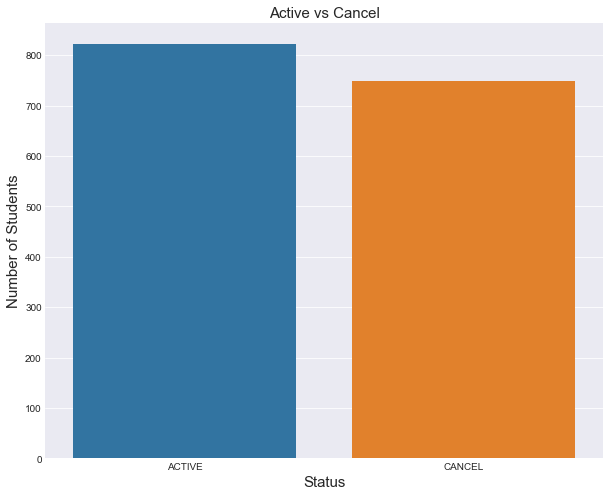

In [246]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Status',data=df)

plt.title('Active vs Cancel',fontsize=15)
plt.xlabel('Status',fontsize=15)
plt.ylabel('Number of Students',fontsize=15)


#### Group by Status, find avg of numerical columns

In [745]:
df.groupby(['Status'])[['DaysEnrollToStart','DaysLeadToEnroll','AgeAtLead']].mean()

,DaysEnrollToStart,DaysLeadToEnroll,AgeAtLead
Status,,,
ACTIVE,110.704380,309.164234,24.874696
CANCEL,93.779706,249.963952,26.540721


In [258]:
df.groupby(['Status','Gender'])[['DaysEnrollToStart','DaysLeadToEnroll','AgeAtLead']].agg(['count','mean'])

DaysEnrollToStart             DaysLeadToEnroll  \
                               count        mean            count   
Status Gender                                                       
ACTIVE Female                    645  109.455814              645   
       Male                      176  115.403409              176   
       Unspecified                 1   89.000000                1   
CANCEL Female                    608   93.828947              608   
       Male                      140   93.735714              140   
       Unspecified                 1   70.000000                1   

                                AgeAtLead             
                           mean     count       mean  
Status Gender                                         
ACTIVE Female        335.144186       645  24.903876  
       Male          206.159091       176  24.732955  
       Unspecified  1681.000000         1  31.000000  
CANCEL Female        253.537829       608  26.587171  
       Male          223.607143       140  26.357143  
       Unspecified  1767.000000         1  24.000000

In [262]:
df.groupby(['Status','Campus'])[['DaysEnrollToStart','DaysLeadToEnroll','AgeAtLead']].agg(['count','mean'])

DaysEnrollToStart             DaysLeadToEnroll              \
                          count        mean            count        mean   
Status Campus                                                              
ACTIVE 1                    246   97.910569              246  368.975610   
       2                    261  117.946360              261  305.352490   
       3                    315  114.695238              315  265.612698   
CANCEL 1                    265   89.143396              265  306.713208   
       2                    242  101.388430              242  260.702479   
       3                    242   91.247934              242  177.082645   

              AgeAtLead             
                  count       mean  
Status Campus                       
ACTIVE 1            246  24.939024  
       2            261  24.666667  
       3            315  24.996825  
CANCEL 1            265  26.852830  
       2            242  26.301653  
       3            242  26.438017

#### Create separate datasets for ACTIVE and CANCEL rows

In [20]:
df_active = df[df.Status == 'ACTIVE']

In [17]:
df_active

,RecordNumber,DaysEnrollToStart,Status,Campus,AdmissionsRepID,ProgramVersion,ZIP,DaysLeadToEnroll,Gender,MaritalStatus,AgeAtLead,LeadSource,IsVeteran,IsHispanic,FinancialAidAdvisorID
0,3107797,48,ACTIVE,1,17007,BSN2015,91732,195,Female,Single,23,12769,0,0,14649.0
1,3076885,130,ACTIVE,1,15985,BSN2015,92336,335,Female,Single,18,12898,0,0,17705.0
3,3107876,126,ACTIVE,3,17430,BSN2015,92672,116,Female,Married,23,1744,0,0,17583.0
4,3109312,103,ACTIVE,3,17430,BSN2015,90201,130,Female,Single,21,1744,0,1,16270.0
7,3129078,105,ACTIVE,2,14186,BSN2015,93619,-1,Female,Single,20,12769,0,0,14799.0
9,3116801,130,ACTIVE,3,17430,BSN2015,92835,55,Female,Single,19,12769,0,0,16207.0
10,3136985,53,ACTIVE,3,17878,BSN2015,92804,-1,Female,Single,22,12767,0,0,17886.0
11,3121614,104,ACTIVE,3,17430,BSN2015,91801,49,Female,Single,22,12769,0,0,17583.0
13,2852906,802,ACTIVE,1,13948,BSNLVN2015,91789,196,Female,Married,30,12811,0,0,15832.0
14,3096849,130,ACTIVE,3,14091,BSN2015,90502,185,Female,NaN,40,12811,0,0,16270.0


In [19]:
df_cancel = df[df.Status == 'CANCEL']

In [21]:
df_cancel.head(5)

,RecordNumber,DaysEnrollToStart,Status,Campus,AdmissionsRepID,ProgramVersion,ZIP,DaysLeadToEnroll,Gender,MaritalStatus,AgeAtLead,LeadSource,IsVeteran,IsHispanic,FinancialAidAdvisorID
2,3134293,73,CANCEL,3,14377,BSN2015,92069,-1,Male,Single,18,12769,0,0,16708.0
5,3139665,34,CANCEL,1,17007,BSN2015,91765,-1,Male,Single,24,1744,0,0,14649.0
6,3137667,48,CANCEL,1,15985,BSNLVN2015,91764,-1,Female,Married,29,12769,0,0,17970.0
8,3128594,109,CANCEL,3,14618,BSNLVN2015,92808,-1,Female,Married,26,12769,0,0,NaN
12,3125236,131,CANCEL,1,15985,BSN2015,92376,-1,Female,NaN,20,12769,0,0,14649.0


In [37]:
active = df['Status'].groupby([df.Campus,df.Status]).agg('count')

In [38]:
active

Campus  Status
1       ACTIVE    246
        CANCEL    265
2       ACTIVE    261
        CANCEL    242
3       ACTIVE    315
        CANCEL    242
Name: Status, dtype: int64

### Exploratory Analysis

In [43]:
import seaborn as sns
sns.set_style('darkgrid')


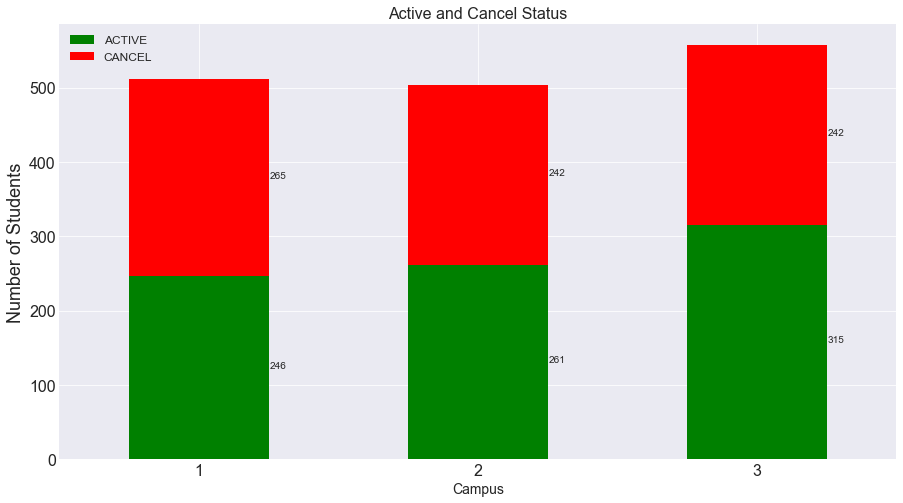

In [65]:
ax = active.unstack().plot.bar(color=list('gr'),figsize=(15,8), stacked = True)
ax.set_title("Active and Cancel Status",fontsize=16)                   
ax.set_xlabel("Campus",fontsize=14)
ax.set_ylabel("Number of Students",fontsize=18)
plt.legend( prop={'size': 12})
ax.set_xticklabels(['1','2','3'],fontsize=16,rotation='horizontal')
ax.set_yticklabels(['0','100','200','300','400','500'],fontsize=16,rotation='horizontal')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()  * 1.005, p.get_y() + p.get_height() * .5))

In [90]:
active1 = df['Status'].groupby([df.FinancialAidAdvisorID,df.Status]).agg('count')

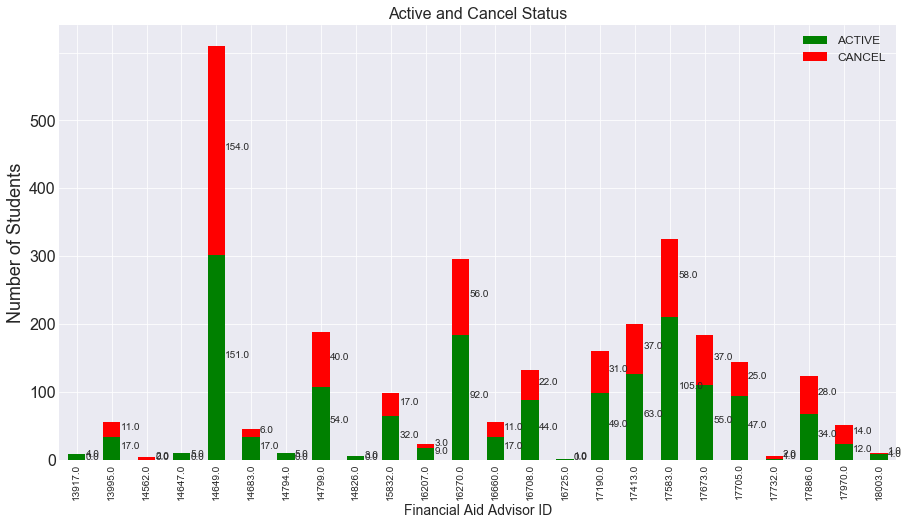

In [809]:
ax = active1.unstack().plot.bar(color=list('gr'),figsize=(15,8), stacked = True)
ax.set_title("Active and Cancel Status",fontsize=16)                   
ax.set_xlabel("Financial Aid Advisor ID",fontsize=14)
ax.set_ylabel("Number of Students",fontsize=18)
plt.legend( prop={'size': 12})
# ax.set_xticklabels(['1','2','3'],fontsize=16,rotation='horizontal')
ax.set_yticklabels(['0','100','200','300','400','500'],fontsize=16,rotation='horizontal')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()  * 1.005, p.get_y() + p.get_height() * .5))

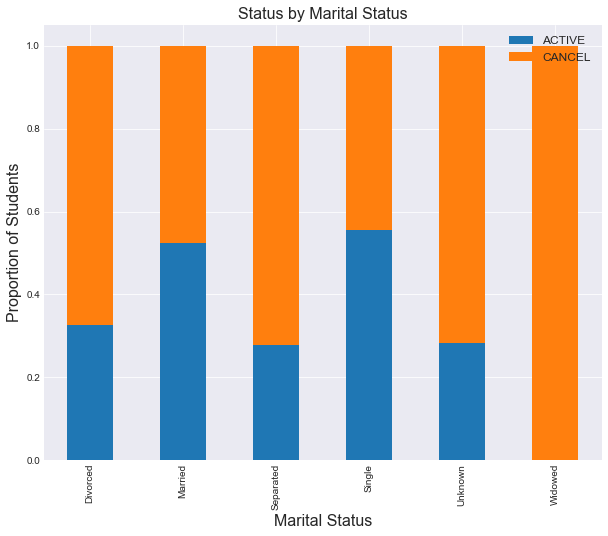

In [771]:

table=pd.crosstab(df.MaritalStatus,df.Status)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(10,8))

plt.title('Status by Marital Status',fontsize=16)
plt.xlabel('Marital Status',fontsize=16)
plt.ylabel('Proportion of Students',fontsize=16)
plt.legend( prop={'size': 12})



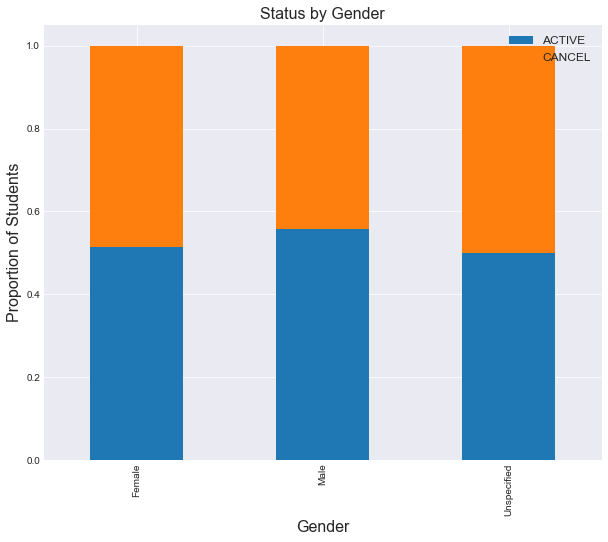

In [807]:

table=pd.crosstab(df.Gender,df.Status)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(10,8))

plt.title('Status by Gender',fontsize=16)
plt.xlabel('Gender',fontsize=16)
plt.ylabel('Proportion of Students',fontsize=16)
plt.legend( prop={'size': 12})


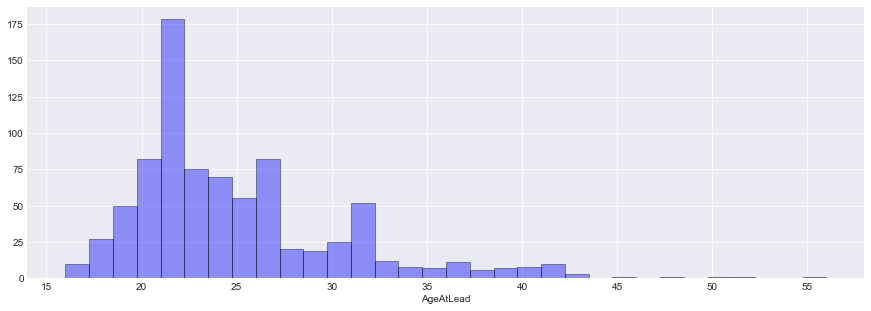

In [131]:
sns.distplot(df_active['AgeAtLead'], hist=True, kde=False, 
           color = 'blue',
             hist_kws={'edgecolor':'black'})

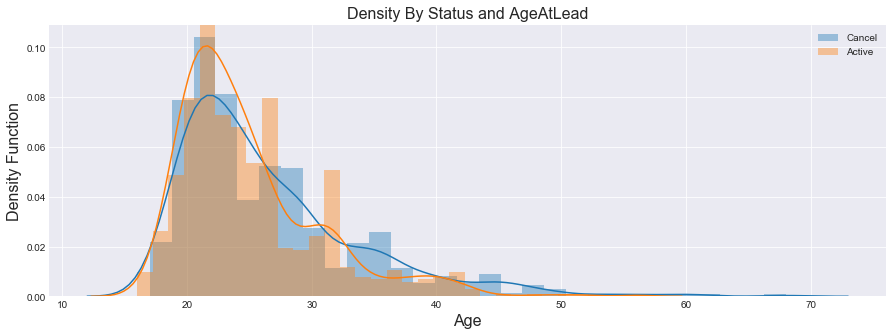

In [775]:
plt.rcParams['figure.figsize']=(15,5)
fig = sns.distplot(df_cancel['AgeAtLead'],label='Cancel',hist=True,kde=True)
fig2 = sns.distplot(df_active['AgeAtLead'],label='Active',hist=True,kde=True)


plt.ylabel('Density Function', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.title('Density By Status and AgeAtLead', fontsize=16)
plt.legend()
plt.show()



In [776]:
# Soc Name by Number of Applications Applied
df_ad = df.groupby('FinancialAidAdvisorID').count().Status.nlargest(10)


Text(0,0.5,'Financial Aid Advisor ID')

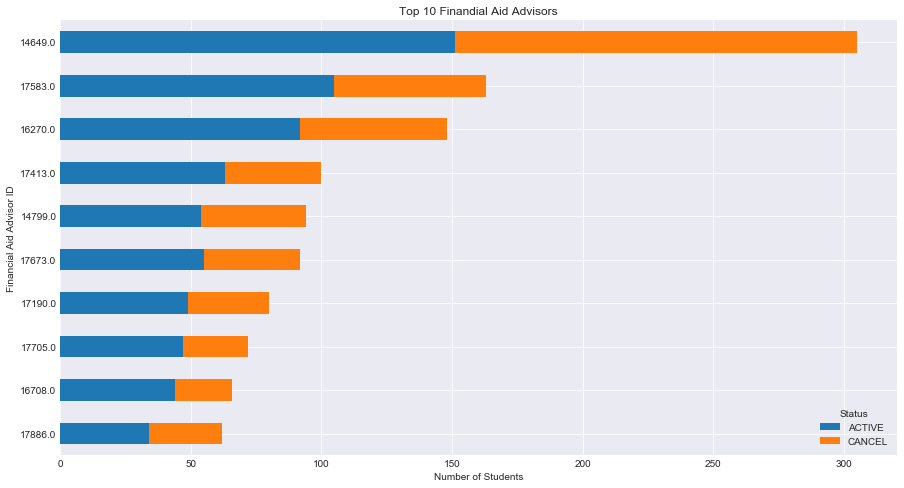

In [785]:
table=pd.crosstab(df.FinancialAidAdvisorID,df.Status)

# table.div(table, axis=0).plot(kind='barh', stacked=True,figsize=(10,8))

df_ad1 = table.reindex(index=df_ad.index[::-1])
ax = df_ad1.plot.barh(figsize=(15,8), stacked = True, 
                        title = "Top 10 Finandial Aid Advisors")
# ft_top10_rv_df = ft_top10_df.reindex(index=ft_top10_df.index[::-1])
ax.set_xlabel("Number of Students")
ax.set_ylabel("Financial Aid Advisor ID")

### Create Dummy Variables

In [521]:
df.columns

Index(['RecordNumber', 'DaysEnrollToStart', 'Status', 'Campus',
       'AdmissionsRepID', 'ProgramVersion', 'ZIP', 'DaysLeadToEnroll',
       'Gender', 'MaritalStatus', 'AgeAtLead', 'LeadSource', 'IsVeteran',
       'IsHispanic', 'FinancialAidAdvisorID'],
      dtype='object')

In [810]:
df1 = pd.get_dummies(data=df, columns=['Gender','MaritalStatus','Campus','LeadSource','AdmissionsRepID', 'ProgramVersion','FinancialAidAdvisorID'])

In [811]:
df1.columns

Index(['RecordNumber', 'DaysEnrollToStart', 'Status', 'ZIP',
       'DaysLeadToEnroll', 'AgeAtLead', 'IsVeteran', 'IsHispanic',
       'Gender_Female', 'Gender_Male',
       ...
       'FinancialAidAdvisorID_16725.0', 'FinancialAidAdvisorID_17190.0',
       'FinancialAidAdvisorID_17413.0', 'FinancialAidAdvisorID_17583.0',
       'FinancialAidAdvisorID_17673.0', 'FinancialAidAdvisorID_17705.0',
       'FinancialAidAdvisorID_17732.0', 'FinancialAidAdvisorID_17886.0',
       'FinancialAidAdvisorID_17970.0', 'FinancialAidAdvisorID_18003.0'],
      dtype='object', length=127)

In [812]:
len(df1.columns)

127

### Create Binary Variable of Status

In [813]:
df1['Status_Binary'] = [1 if x == 'ACTIVE' else 0 for x in df1['Status']]

In [814]:
df1 = df1.drop('Status',axis=1)

In [815]:
df1.head()

,RecordNumber,DaysEnrollToStart,ZIP,DaysLeadToEnroll,AgeAtLead,IsVeteran,IsHispanic,Gender_Female,Gender_Male,Gender_Unspecified,...,FinancialAidAdvisorID_17190.0,FinancialAidAdvisorID_17413.0,FinancialAidAdvisorID_17583.0,FinancialAidAdvisorID_17673.0,FinancialAidAdvisorID_17705.0,FinancialAidAdvisorID_17732.0,FinancialAidAdvisorID_17886.0,FinancialAidAdvisorID_17970.0,FinancialAidAdvisorID_18003.0,Status_Binary
0,3107797,48,91732,195,23,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3076885,130,92336,335,18,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3134293,73,92069,-1,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3107876,126,92672,116,23,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3109312,103,90201,130,21,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Perform Test Train Split

In [816]:
y = df1['Status_Binary']

In [822]:
X = df1.ix[:,0:-1]

In [823]:
X = X.drop(['RecordNumber','ZIP'],axis=1)

In [824]:
X

,DaysEnrollToStart,DaysLeadToEnroll,AgeAtLead,IsVeteran,IsHispanic,Gender_Female,Gender_Male,Gender_Unspecified,MaritalStatus_Divorced,MaritalStatus_Married,...,FinancialAidAdvisorID_16725.0,FinancialAidAdvisorID_17190.0,FinancialAidAdvisorID_17413.0,FinancialAidAdvisorID_17583.0,FinancialAidAdvisorID_17673.0,FinancialAidAdvisorID_17705.0,FinancialAidAdvisorID_17732.0,FinancialAidAdvisorID_17886.0,FinancialAidAdvisorID_17970.0,FinancialAidAdvisorID_18003.0
0,48,195,23,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130,335,18,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,73,-1,18,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,126,116,23,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,103,130,21,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,34,-1,24,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,48,-1,29,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,105,-1,20,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,109,-1,26,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,130,55,19,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [825]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.8)

In [837]:
logistic_model = LogisticRegression()
param_grid={"penalty":['l1','l2'],"C":[1e-10,1e-8,1e-5,1e-3,1e-1,1,5,8,10,14,16,18,20,21,22,23,24,25,30,100]}
log = GridSearchCV(estimator=logistic_model,param_grid=param_grid,cv=10,scoring='roc_auc')

In [838]:
log.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5, 8, 10, 14, 16, 18, 20, 21, 22, 23, 24, 25, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [839]:
log.grid_scores_

/Users/jennifer/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50000, std: 0.00000, params: {'C': 1e-10, 'penalty': 'l1'},
 mean: 0.55454, std: 0.04344, params: {'C': 1e-10, 'penalty': 'l2'},
 mean: 0.50000, std: 0.00000, params: {'C': 1e-08, 'penalty': 'l1'},
 mean: 0.55534, std: 0.04514, params: {'C': 1e-08, 'penalty': 'l2'},
 mean: 0.50000, std: 0.00000, params: {'C': 1e-05, 'penalty': 'l1'},
 mean: 0.55222, std: 0.03263, params: {'C': 1e-05, 'penalty': 'l2'},
 mean: 0.53556, std: 0.03691, params: {'C': 0.001, 'penalty': 'l1'},
 mean: 0.57098, std: 0.02557, params: {'C': 0.001, 'penalty': 'l2'},
 mean: 0.60424, std: 0.01953, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.65245, std: 0.04646, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.70735, std: 0.05272, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.69780, std: 0.05535, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.71321, std: 0.05237, params: {'C': 5, 'penalty': 'l1'},
 mean: 0.70814, std: 0.05468, params: {'C': 5, 'penalty': 'l2'},
 mean: 0.71222, std: 0.05242, params: {'C': 8, 'penalt

In [840]:
#Best score is **C = .1** and penalty is **l1**, because it starts leveling after that
print(log.best_score_)
print(log.best_params_)
print(log.best_estimator_)

0.7132107348388
{'C': 5, 'penalty': 'l1'}
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [841]:
logistic_model = LogisticRegression(C=5,penalty='l1')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

In [842]:
accuracy_score1 = accuracy_score(y_test, y_pred)
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)
print(accuracy_score1)
print(precision_score1)
print(recall_score1)
print(f1_score1)

0.6205250596658711
0.6076732673267327
0.7542242703533026
0.6730637422892393


In [843]:
#Function will plot confusion matrix plot
def plot_confusion_matrix(cm,title='Confusion matrix',cmap=plt.cm.Reds):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [864]:
# Create train_score that will return precision and recall and plot confusion matrix
def train_score(classifier,X,y):
    X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y, test_size =.2)
    y_train=y_train
    clf = classifier.fit(X_train,y_train)
    ## accuracy for test and train set
    train_accuracy = clf.score(X_train,y_train)
    test_accuracy = clf.score(X_test,y_test)
    
    print("Training Data Accuracy: %0.2f" %(train_accuracy))
    print("Test Data Accuracy:     %0.2f" %(test_accuracy))
    
    y_true = y_test
    y_pred = clf.predict(X_test)
    
    conf = confusion_matrix(y_true, y_pred)
    print(conf)
  
    
    print ('\n')
    print ("Precision:              %0.2f" %(conf[1, 1] / (conf[1, 1] + conf[0, 1])))
    print ("Recall:                 %0.2f"% (conf[1, 1] / (conf[1, 1] + conf[1, 0])))
    print ("Specificity:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    cm=confusion_matrix(y_true,y_pred)
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.72
Test Data Accuracy:     0.67
[[ 85  56]
 [ 48 126]]


Precision:              0.69
Recall:                 0.72
Specificity:                 0.60


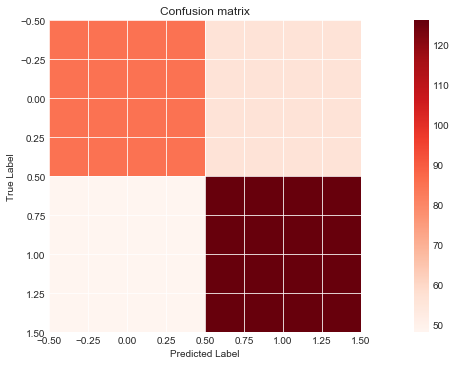

In [865]:
train_score(logistic_model,X,y)

In [846]:
#Perform feature selection
from sklearn.feature_selection import RFE
rfe = RFE(logistic_model)
rfe = rfe.fit(X,y)
print(len(rfe.support_))
print(rfe.ranking_)

124
[36 40 33  1  8 21 42 41  1  1  1  1  1  1  1 55 54 58 37 17  1 32 35  1
  1 11  1  1 63 27  1 60  1 59 12  6  5 20 39 57  1 45  1 23 52 50  1  1
  1  1 14  1  1 47 19  1  1  1  1  1  1 38  1  1 46  9  1  1  1  1 30 34
 10 26  1 61  2 31 29 13 43  4  1 15 51  7 48  1 53 49 28 25 24 22 16  1
  3 56 18 62  1  1 44  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [847]:
values = rfe.support_

In [848]:
values

array([False, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [849]:
keys = X_train.columns
dict1 = dict(zip(keys,values))

In [850]:
dict1

{'AdmissionsRepID_13818': False,
 'AdmissionsRepID_13857': False,
 'AdmissionsRepID_13874': False,
 'AdmissionsRepID_13948': True,
 'AdmissionsRepID_14091': False,
 'AdmissionsRepID_14186': False,
 'AdmissionsRepID_14377': False,
 'AdmissionsRepID_14425': False,
 'AdmissionsRepID_14618': False,
 'AdmissionsRepID_15034': False,
 'AdmissionsRepID_15107': False,
 'AdmissionsRepID_15180': True,
 'AdmissionsRepID_15592': False,
 'AdmissionsRepID_15985': False,
 'AdmissionsRepID_16220': False,
 'AdmissionsRepID_16276': False,
 'AdmissionsRepID_16321': True,
 'AdmissionsRepID_16376': False,
 'AdmissionsRepID_16502': False,
 'AdmissionsRepID_16780': False,
 'AdmissionsRepID_17007': False,
 'AdmissionsRepID_17233': False,
 'AdmissionsRepID_17430': False,
 'AdmissionsRepID_17843': False,
 'AdmissionsRepID_17878': True,
 'AdmissionsRepID_3802': False,
 'AgeAtLead': False,
 'Campus_1': True,
 'Campus_2': False,
 'Campus_3': False,
 'DaysEnrollToStart': False,
 'DaysLeadToEnroll': False,
 'Financia

In [851]:
sign_col = []
for key, value in dict1.items():
    if value == True:
        sign_col.append(key)

In [852]:
len(sign_col)

62

In [853]:
import statsmodels.api as sm

In [854]:
X1 = X[sign_col]

In [855]:
y1 = df1['Status_Binary']

In [856]:
X1.columns

Index(['IsVeteran', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Separated', 'MaritalStatus_Single',
       'MaritalStatus_Unknown', 'MaritalStatus_Widowed', 'Campus_1',
       'LeadSource_1747', 'LeadSource_1910', 'LeadSource_1911',
       'LeadSource_2016', 'LeadSource_2018', 'LeadSource_2024',
       'LeadSource_2031', 'LeadSource_12773', 'LeadSource_12788',
       'LeadSource_12832', 'LeadSource_12839', 'LeadSource_12842',
       'LeadSource_12849', 'LeadSource_12889', 'LeadSource_12895',
       'LeadSource_12902', 'LeadSource_12917', 'LeadSource_12918',
       'LeadSource_12927', 'LeadSource_13005', 'LeadSource_13087',
       'LeadSource_13109', 'LeadSource_13161', 'LeadSource_13233',
       'LeadSource_13237', 'LeadSource_13258', 'LeadSource_13267',
       'AdmissionsRepID_13948', 'AdmissionsRepID_15180',
       'AdmissionsRepID_16321', 'AdmissionsRepID_17878',
       'FinancialAidAdvisorID_13917.0', 'FinancialAidAdvisorID_13995.0',
       'FinancialAi

In [857]:

logit = sm.Logit(y1,X1)

# fit the model
result = logit.fit()


         Current function value: 0.578640
         Iterations: 35


/Users/jennifer/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [858]:
from scipy import stats

In [859]:
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:          Status_Binary   No. Observations:                 1571
Model:                          Logit   Df Residuals:                     1509
Method:                           MLE   Df Model:                           61
Date:                Fri, 20 Apr 2018   Pseudo R-squ.:                  0.1639
Time:                        10:34:22   Log-Likelihood:                -909.04
converged:                      False   LL-Null:                       -1087.2
                                        LLR p-value:                 2.554e-43
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
IsVeteran                         0.9386      0.329      2.857      0.004       0.295       1.583
MaritalStatus_Divorced           -2.7989      0.416     -6.736      0.000 

In [860]:
print (np.exp(result.params))

IsVeteran                        2.556486e+00
MaritalStatus_Divorced           6.087713e-02
MaritalStatus_Married            1.646065e-01
MaritalStatus_Separated          3.011305e-02
MaritalStatus_Single             1.663096e-01
MaritalStatus_Unknown            8.945388e-02
MaritalStatus_Widowed            3.318830e-11
Campus_1                         8.764073e-09
LeadSource_1747                  7.212914e-06
LeadSource_1910                  3.786651e+08
LeadSource_1911                  3.636372e+08
LeadSource_2016                  5.292900e-15
LeadSource_2018                  2.841931e-01
LeadSource_2024                  8.160079e-09
LeadSource_2031                  9.858791e+07
LeadSource_12773                 1.726513e+00
LeadSource_12788                 6.205659e-05
LeadSource_12832                 6.542846e+08
LeadSource_12839                 1.144524e+11
LeadSource_12842                 6.713817e-10
LeadSource_12849                 2.886872e-77
LeadSource_12889                 2

Text(0,0.5,'TPR')

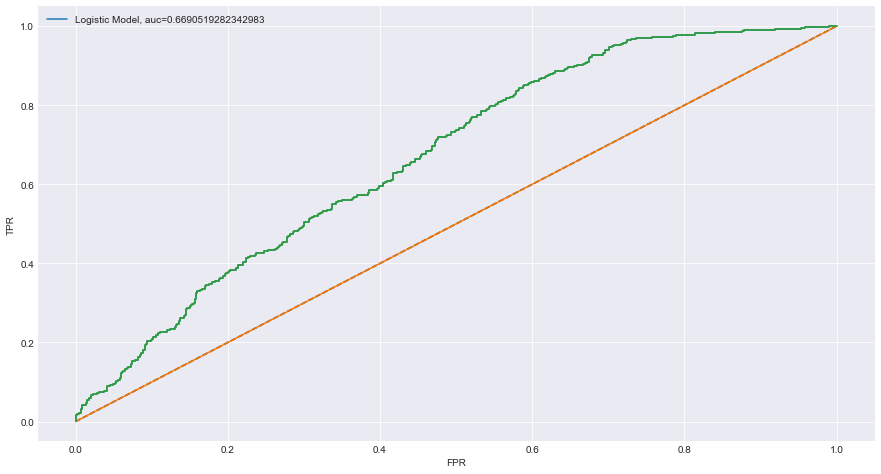

In [861]:
#Plot the ROC
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(15,8))


# plt.figure(0).clf()
#Plot the Logistic Regression Curve

log_model = LogisticRegression(C=10,penalty='l1')
log_model.fit(X_train,y_train)
y_score = log_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_score)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='Logistic Model, auc='+str(roc_auc))

plt.legend(loc=0)
plt.plot([0, 1], [0, 1], 'k--')
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

